# Imports for Visualization of Video Tags

This code cell imports necessary libraries and defines functions to visualize the tags associated with YouTube videos. It prepares to analyze and visualize the distribution of tags using various visualization techniques.

In [ ]:
import csv
import pickle
import squarify
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.offsetbox as offsetbox

# Analyzing Video Tags and Views

This code cell reads data from CSV and pickle files to create dictionaries mapping video links to their views and tags, respectively. It then combines these dictionaries to create a new dictionary mapping tags to their total views across all videos. Finally, it sorts the tags based on their total views in descending order and prints the tags with the most views.

In [ ]:
# Read the CSV file and create a dictionary mapping video links to their views
video_views = {}
with open('Simplilearn-Duration-Views.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        video_link = row['Link']
        temp = row['Views'].replace(",", "")
        if(temp==""):
            continue
        # print(temp)
        views = int(temp)
        video_views[video_link] = views

# Read the pickle file and create a dictionary mapping video links to their tags
with open('results_simplilearn.pickle', 'rb') as picklefile:
    video_tags = pickle.load(picklefile)

# Combine the two dictionaries to create a new dictionary mapping tags to total views
tag_views = {}
for video_link, tags in video_tags.items():
    for tag in tags:
        tag_views[tag] = tag_views.get(tag, 0) + video_views.get(video_link, 0)

# Sort the tag_views dictionary by total views in descending order
sorted_tag_views = sorted(tag_views.items(), key=lambda x: x[1], reverse=True)

# Print the tags with the most views
for tag, views in sorted_tag_views:
    print(f"{tag}: {views} views")

# Visualizing Top 30 Tags by Total Views

This code cell generates a bar plot to visualize the top 30 tags by their total views. It extracts the top 30 tags and their corresponding total views from the sorted dictionary of tag views. Then, it creates two lists for tags and views and uses them to create a bar plot.

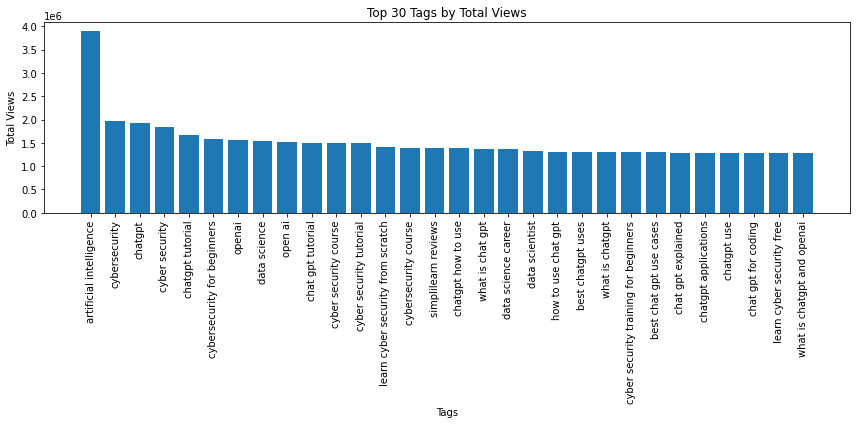

In [31]:
# Get the top 30 tags and their total views
top_30_tags = sorted_tag_views[1:31]

# Separate the tags and views into two lists
tags = [tag for tag, views in top_30_tags]
views = [views for tag, views in top_30_tags]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(tags, views)
plt.xlabel('Tags')
plt.ylabel('Total Views')
plt.title('Top 30 Tags by Total Views')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualizing Top 30 Tags by Total Views with Treemap

This code cell generates a treemap visualization to represent the top 30 tags by their total views. It defines a custom color map, normalizes the total views to a range of 0-1, and creates the treemap using the `Squarify` library. Text annotations are added to the treemap for each tag, and the axis ticks and spines are removed for better visualization.

/tmp/ipykernel_25230/1829800220.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


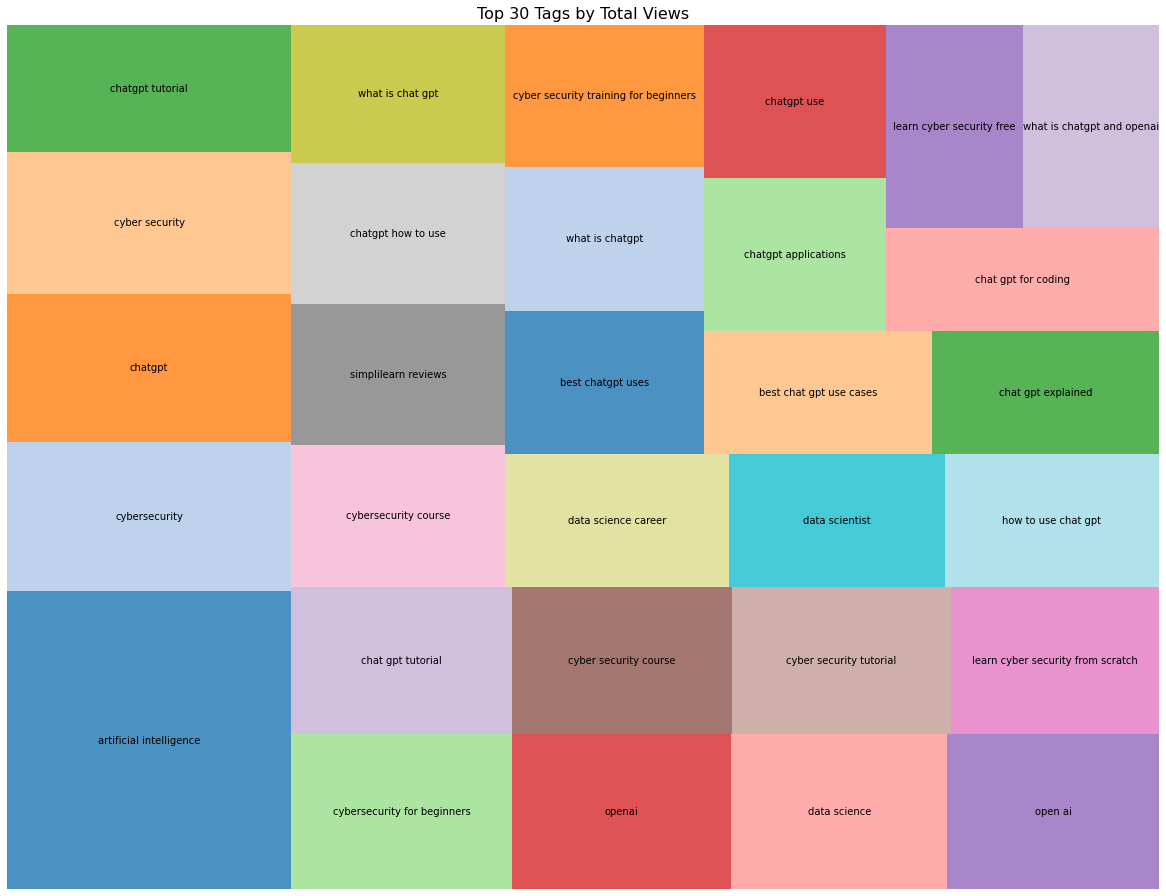

In [32]:
# Define a custom color map
colors = [mcolors.rgb2hex(plt.cm.tab20(i)) for i in range(20)]

# Normalize the total views to a range of 0-1
max_views = max(views)
norm_views = [v / max_views for v in views]

# Create the tree map
fig = plt.figure(figsize=(16, 12))
ax = fig.add_axes([0, 0, 1, 1])
squarify.plot(sizes=norm_views, label=tags, ax=ax, color=colors, alpha=0.8)

# Add wrapped text annotations
for rect, label in zip(ax.collections, tags):
    r = rect.get_extents()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    txt = offsetbox.TextArea(label, minimumdescent=False)
    txt_box = offsetbox.AnnotationBboxWatcher(txt, (r.x0 + r.width / 2, r.y0 + r.height / 2), xycoords='data', boxcoords="offset points", bboxprops=bbox_props)
    ax.add_artist(txt_box)

# Remove the axis ticks and spines
ax.axis('off')

# Add a title and adjust the layout
plt.title('Top 30 Tags by Total Views', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

# Analyzing Tags by Total Views

This code cell reads a CSV file containing video links and their corresponding views. It also reads a pickle file containing a dictionary mapping video links to their tags. The code combines these two sources of data to create a new dictionary mapping tags to their total views across all videos. Finally, it sorts the tags by their total views in descending order and prints the top tags along with their total views.

In [ ]:
# Read the CSV file and create a dictionary mapping video links to their views
video_views = {}
with open('upGrad-Duration-Views.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        video_link = row['Link']
        temp = row['Views'].replace(",", "")
        if(temp==""):
            continue
        # print(temp)
        views = int(temp)
        video_views[video_link] = views

# Read the pickle file and create a dictionary mapping video links to their tags
with open('results.pickle', 'rb') as picklefile:
    video_tags = pickle.load(picklefile)

# Combine the two dictionaries to create a new dictionary mapping tags to total views
tag_views = {}
for video_link, tags in video_tags.items():
    for tag in tags:
        tag_views[tag] = tag_views.get(tag, 0) + video_views.get(video_link, 0)

# Sort the tag_views dictionary by total views in descending order
sorted_tag_views = sorted(tag_views.items(), key=lambda x: x[1], reverse=True)

# Print the tags with the most views
for tag, views in sorted_tag_views:
    print(f"{tag}: {views} views")

# Visualizing Top 30 Tags by Total Views

This code cell visualizes the top 30 tags by their total views. It first extracts the top 30 tags and their corresponding total views from the sorted dictionary of tags and views. Then, it separates the tags and views into two lists. Finally, it creates a bar plot where the x-axis represents the tags and the y-axis represents the total views, allowing for a visual comparison of the top tags based on their popularity.

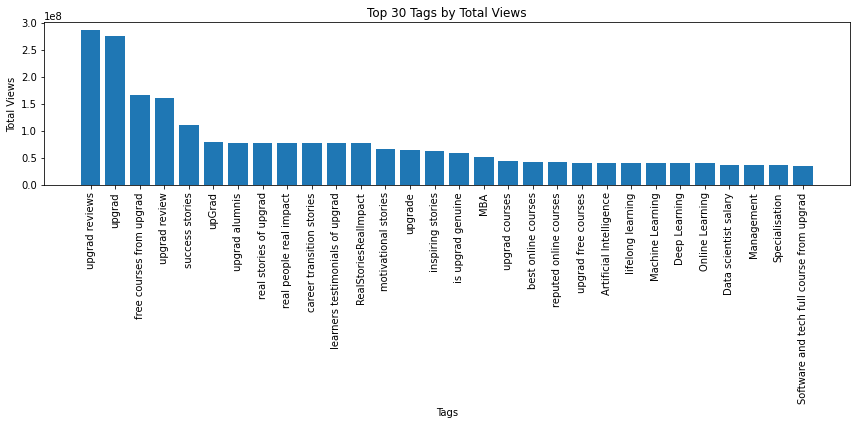

In [34]:
# Get the top 30 tags and their total views
top_30_tags = sorted_tag_views[1:31]

# Separate the tags and views into two lists
tags = [tag for tag, views in top_30_tags]
views = [views for tag, views in top_30_tags]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(tags, views)
plt.xlabel('Tags')
plt.ylabel('Total Views')
plt.title('Top 30 Tags by Total Views')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualizing Top 30 Tags by Total Views Using Tree Map

This code cell visualizes the top 30 tags by their total views using a tree map. It first defines a custom color map for the tree map and normalizes the total views to a range of 0-1. Then, it creates the tree map using the `squarify` library, where each tag is represented by a rectangle whose size is proportional to its total views. Wrapped text annotations are added to display the tag labels within the rectangles. Finally, the axis ticks and spines are removed for a cleaner appearance, and a title is added to the plot.

/tmp/ipykernel_25230/1829800220.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


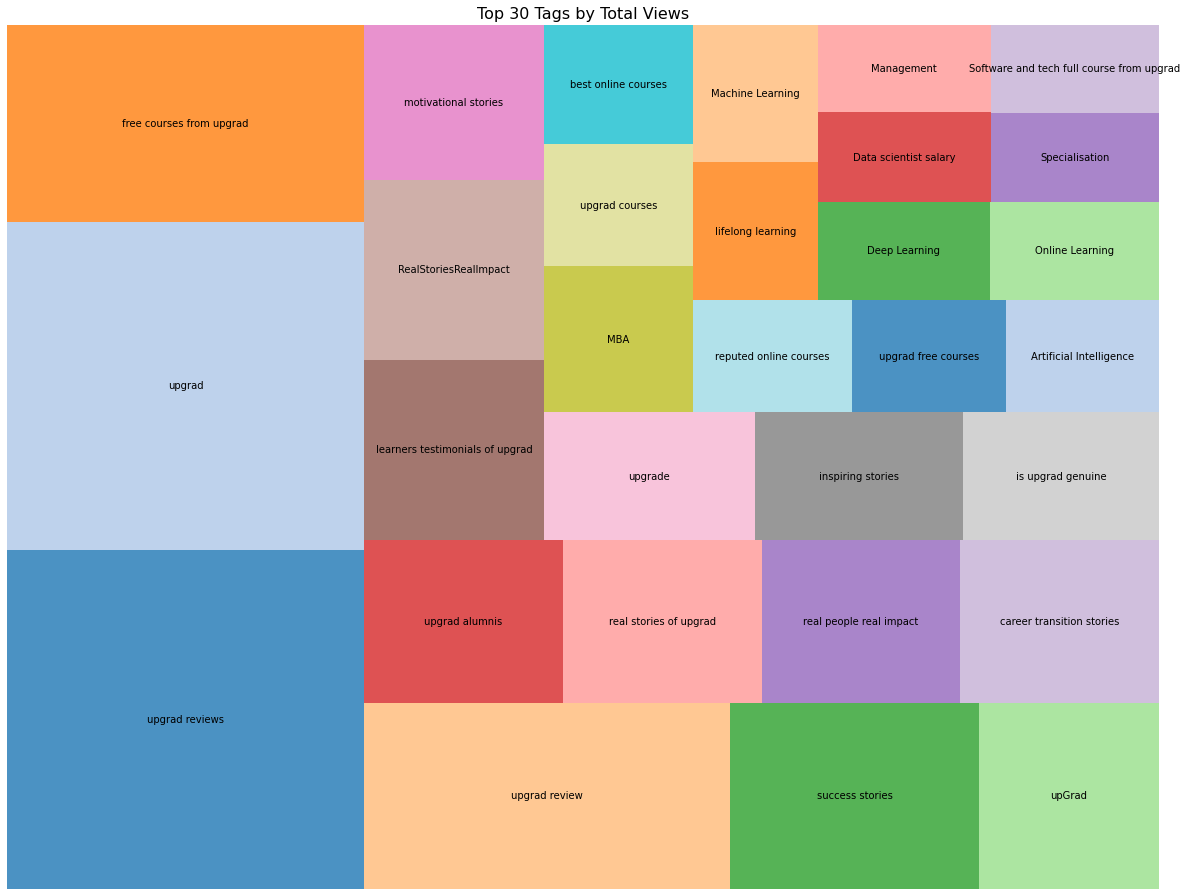

In [35]:
# Define a custom color map
colors = [mcolors.rgb2hex(plt.cm.tab20(i)) for i in range(20)]

# Normalize the total views to a range of 0-1
max_views = max(views)
norm_views = [v / max_views for v in views]

# Create the tree map
fig = plt.figure(figsize=(16, 12))
ax = fig.add_axes([0, 0, 1, 1])
squarify.plot(sizes=norm_views, label=tags, ax=ax, color=colors, alpha=0.8)

# Add wrapped text annotations
for rect, label in zip(ax.collections, tags):
    r = rect.get_extents()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    txt = offsetbox.TextArea(label, minimumdescent=False)
    txt_box = offsetbox.AnnotationBboxWatcher(txt, (r.x0 + r.width / 2, r.y0 + r.height / 2), xycoords='data', boxcoords="offset points", bboxprops=bbox_props)
    ax.add_artist(txt_box)

# Remove the axis ticks and spines
ax.axis('off')

# Add a title and adjust the layout
plt.title('Top 30 Tags by Total Views', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()